<a href="https://colab.research.google.com/github/rocketwolf98/FitBitEda/blob/main/Fitbit_Tracker_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fitbit Exploratory Data Analysis
This example exploratory data analysis explores several factors including calories, intensities, heart rates and steps.

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = kagglehub.dataset_download("arashnic/fitbit")

100%|██████████| 43.3M/43.3M [00:01<00:00, 30.3MB/s]

Extracting files...


In [ ]:
heartrate = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv')
intensity_min = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv')
calories = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv')

#### 1.0. Summary Statistics

In [ ]:
#Heart rate summary statistics
print(heartrate.info())
print('----------')
print(heartrate.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1154681 non-null  int64 
 1   Time    1154681 non-null  object
 2   Value   1154681 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ MB
None
----------
                  Id                 Time         Value
count   1.154681e+06              1154681  1.154681e+06
unique           NaN               510597           NaN
top              NaN  4/5/2016 5:35:00 PM           NaN
freq             NaN                   13           NaN
mean    5.352122e+09                  NaN  7.975687e+01
std     2.033584e+09                  NaN  1.872988e+01
min     2.022484e+09                  NaN  3.600000e+01
25%     4.020333e+09                  NaN  6.600000e+01
50%     5.553957e+09                  NaN  7.700000e+01
75%     6.962181e+09                  NaN  9.000000e+01
max     8.87768

In [ ]:
#Intensity summary statistics
intensity_min.info()
print('----------')
print(intensity_min.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1445040 non-null  int64 
 1   ActivityMinute  1445040 non-null  object
 2   Intensity       1445040 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.1+ MB
----------
                  Id         ActivityMinute     Intensity
count   1.445040e+06                1445040  1.445040e+06
unique           NaN                  45300           NaN
top              NaN  3/12/2016 12:00:00 AM           NaN
freq             NaN                     33           NaN
mean    4.889424e+09                    NaN  1.804386e-01
std     2.421516e+09                    NaN  4.942197e-01
min     1.503960e+09                    NaN  0.000000e+00
25%     2.347168e+09                    NaN  0.000000e+00
50%     4.558610e+09                    NaN  0.000000e+00
75%     6.962181

In [ ]:
#Calories summary statistics
calories.info()
print('----------')
print(calories.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445040 entries, 0 to 1445039
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1445040 non-null  int64  
 1   ActivityMinute  1445040 non-null  object 
 2   Calories        1445040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.1+ MB
----------
                  Id         ActivityMinute      Calories
count   1.445040e+06                1445040  1.445040e+06
unique           NaN                  45300           NaN
top              NaN  3/12/2016 12:00:00 AM           NaN
freq             NaN                     33           NaN
mean    4.889424e+09                    NaN  1.571299e+00
std     2.421516e+09                    NaN  1.361955e+00
min     1.503960e+09                    NaN  0.000000e+00
25%     2.347168e+09                    NaN  9.357000e-01
50%     4.558610e+09                    NaN  1.217600e+00

In [ ]:
#Show heart rate table
heartrate.head(5)

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [ ]:
#Show intensity table
intensity_min.head(5)

,Id,ActivityMinute,Intensity
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 12:01:00 AM,0
2,1503960366,3/12/2016 12:02:00 AM,0
3,1503960366,3/12/2016 12:03:00 AM,0
4,1503960366,3/12/2016 12:04:00 AM,0


In [ ]:
#Show calories table
calories.head(5)

,Id,ActivityMinute,Calories
0,1503960366,3/12/2016 12:00:00 AM,0.7973
1,1503960366,3/12/2016 12:01:00 AM,0.7973
2,1503960366,3/12/2016 12:02:00 AM,0.7973
3,1503960366,3/12/2016 12:03:00 AM,0.7973
4,1503960366,3/12/2016 12:04:00 AM,0.7973


#### 1.1 Analyzing Distribution

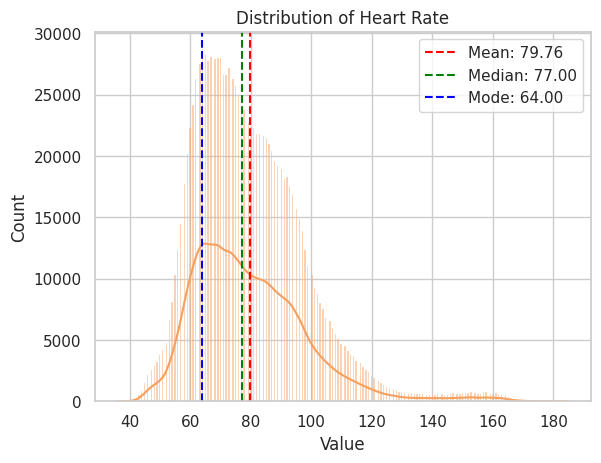

In [ ]:
# Analyzing Heart Rate Distribution
sns.set_theme(style='whitegrid', palette='Oranges_d')
sns.histplot(data=heartrate, x='Value', kde= True)
plt.axvline(x=heartrate['Value'].mean(), c='red', ls='--', label=f"Mean: {heartrate['Value'].mean():.2f}")
plt.axvline(x=heartrate['Value'].median(), c='green', ls='--', label=f"Median: {heartrate['Value'].median():.2f}")
plt.axvline(x=heartrate['Value'].mode()[0], c='blue', ls='--', label=f"Mode: {heartrate['Value'].mode()[0]:.2f}")
plt.title("Distribution of Heart Rate")
plt.legend()
plt.show()

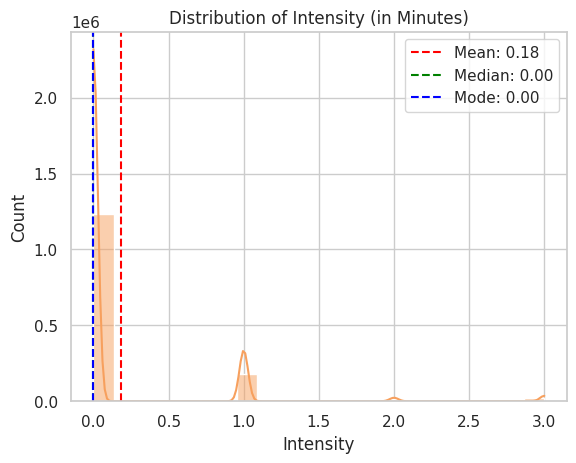

In [ ]:
# Analyzing Intensity Distribution
sns.histplot(data=intensity_min, x='Intensity', kde= True)
plt.axvline(x=intensity_min['Intensity'].mean(), c='red', ls='--', label=f"Mean: {intensity_min['Intensity'].mean():.2f}")
plt.axvline(x=intensity_min['Intensity'].median(), c='green', ls='--', label=f"Median: {intensity_min['Intensity'].median():.2f}")
plt.axvline(x=intensity_min['Intensity'].mode()[0], c='blue', ls='--', label=f"Mode: {intensity_min['Intensity'].mode()[0]:.2f}")
plt.title("Distribution of Intensity (in Minutes)")
plt.legend()
plt.show()

#It seems like this is not continous data but rather an Interval Data

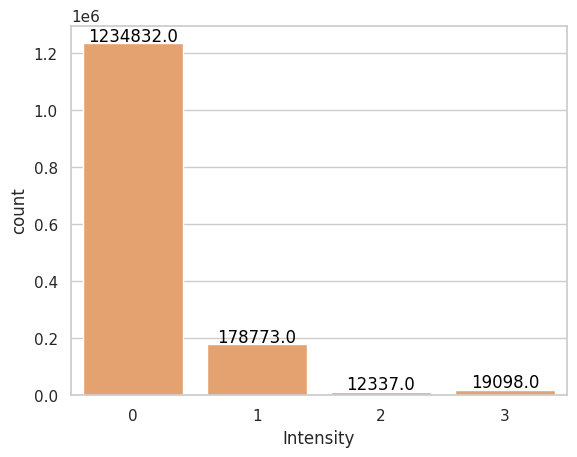

In [ ]:
# # Let's make a lineplot instead
ax = sns.countplot(data=intensity_min, x='Intensity')

for i in ax.patches:
  ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


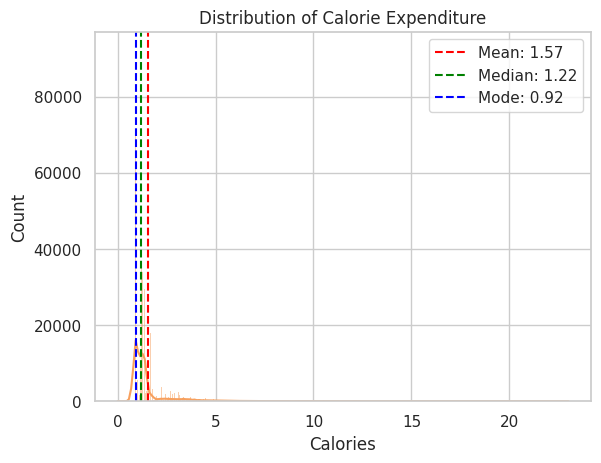

In [ ]:
# Analyzing Calorie Distribution
sns.set_theme(style='whitegrid', palette='Oranges_d')
sns.histplot(data=calories, x='Calories', kde= True)
plt.axvline(x=calories['Calories'].mean(), c='red', ls='--', label=f"Mean: {calories['Calories'].mean():.2f}")
plt.axvline(x=calories['Calories'].median(), c='green', ls='--', label=f"Median: {calories['Calories'].median():.2f}")
plt.axvline(x=calories['Calories'].mode()[0], c='blue', ls='--', label=f"Mode: {calories['Calories'].mode()[0]:.2f}")
plt.title("Distribution of Calorie Expenditure")
plt.legend()
plt.show()

#### 1.2 Merging Tables

In [ ]:
print(heartrate.shape)
print(intensity_min.shape)
print(calories.shape)
#our shape seems large which literally crashed the colab instance
#data_merged = heartrate.merge(intensity_min, on='Id', how='inner').merge(calories, on='Id', how='inner)


(1154681, 3)
(1445040, 3)
(1445040, 3)


In [ ]:
#let's try merging them by chunks

# chunk_size = 100000
# chunks= []

# for i in range(0, len(heartrate), chunk_size):
#   chunk = heartrate.iloc[i:i + chunk_size].merge(intensity_min, on='Id', how='inner').merge(intensity_min, on='Id', how='inner')
#   chunks.append(chunk)

# data_merged= pd.concat(chunks)

#okay that didn't work too since its too large for colab to handle
#let's try using dask if thats the case.

In [ ]:
# let us try to check memory usage of the dataset
print(heartrate.memory_usage(deep=True).sum() / 1e9, "GB")
print(intensity_min.memory_usage(deep=True).sum() / 1e9, "GB")
print(calories.memory_usage(deep=True).sum()/ 1e9, "GB")
# i think the merging job eats a lot of ram, but still lets try dask


0.106741788 GB
0.134335992 GB
0.134335992 GB


In [ ]:
# !pip install dask[dataframe]
# import dask.dataframe as dd
# heartrate = dd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv')
# intensity_min = dd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv')
# calories = dd.read_csv('/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv')

In [ ]:
#hoping this will not crash
# data_merged = heartrate.merge(intensity_min, on='Id', how='inner')

In [ ]:
# data_merged.head()
# reading the data crashed the instance unfortunately :(

In [ ]:
#Let's cut down the dataset to a 1000 to keep up with the memory
heartrate_s = heartrate[:1000]
intensity_s = intensity_min[:1000]
calories_s = calories[:1000]
print(heartrate_s.shape)
print(intensity_s.shape)
print(calories_s.shape)

heartrate_s



(1000, 3)
(1000, 3)
(1000, 3)


,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100
...,...,...,...
995,2022484408,4/1/2016 10:03:30 AM,102
996,2022484408,4/1/2016 10:03:40 AM,104
997,2022484408,4/1/2016 10:03:45 AM,103
998,2022484408,4/1/2016 10:04:00 AM,104


In [ ]:
data_merged = intensity_s.merge(calories_s, on=['ActivityMinute', 'Id'], how='inner')
data_merged.head()
#i realized that these measurements are done by the minute.
#we cannot merge the heart rate as of the moment. lets try dropping duplicates

,Id,ActivityMinute,Intensity,Calories
0,1503960366,3/12/2016 12:00:00 AM,0,0.7973
1,1503960366,3/12/2016 12:01:00 AM,0,0.7973
2,1503960366,3/12/2016 12:02:00 AM,0,0.7973
3,1503960366,3/12/2016 12:03:00 AM,0,0.7973
4,1503960366,3/12/2016 12:04:00 AM,0,0.7973


In [ ]:
data_merged_drop = data_merged.drop_duplicates(['Id'],keep='first')


In [ ]:
data_merged_drop.head()
#realization: since we are looking to find significance between these factors, we will keep the last instance of the measurement of intensity and calories

,Id,ActivityMinute,Intensity,Calories
0,1503960366,3/12/2016 12:00:00 AM,0,0.7973


In [ ]:
#removing dupes
intensity_drop = intensity_min.drop_duplicates(['Id'], keep='last')
calories_drop = calories.drop_duplicates(['Id'], keep='last')

In [ ]:
#checking shape
print(intensity_drop.shape)
print(calories_drop.shape)
#wow a significant drop

(34, 3)
(34, 3)


In [ ]:
data_merged = intensity_drop.merge(calories_drop, on=['Id','ActivityMinute'], how='inner')

In [ ]:
data_merged
# i found out that some data points from the heart rate (some ids are missing). lets try dropping some from the heart rate.

,Id,ActivityMinute,Intensity,Calories
0,1503960366,4/11/2016 11:59:00 PM,0,0.786500
1,1624580081,4/12/2016 10:59:00 AM,1,2.326800
2,1644430081,4/10/2016 3:59:00 AM,0,1.405300
3,1844505072,4/12/2016 6:59:00 AM,0,0.935700
4,1927972279,4/12/2016 10:59:00 AM,0,1.406000
5,2022484408,4/12/2016 10:59:00 AM,0,1.141470
6,2026352035,4/12/2016 9:59:00 AM,0,0.852610
7,2320127002,4/12/2016 10:59:00 AM,1,6.992000
8,2347167796,4/12/2016 6:59:00 AM,0,0.940600
9,2873212765,4/11/2016 7:59:00 PM,0,0.878300


In [ ]:
heartrate_drop = heartrate.drop_duplicates(['Id'], keep='last')
heartrate_drop

,Id,Time,Value
56482,2022484408,4/12/2016 11:03:15 AM,69
56921,2026352035,4/2/2016 2:31:45 AM,64
177725,2347167796,4/11/2016 9:46:05 PM,86
461519,4020332650,4/12/2016 5:19:27 AM,63
530858,4558609924,4/12/2016 10:31:45 AM,78
628655,5553957443,4/12/2016 8:12:10 AM,79
716304,5577150313,4/11/2016 10:48:20 AM,102
769970,6117666160,4/9/2016 5:10:45 PM,98
773717,6391747486,4/8/2016 6:12:55 PM,70
808817,6775888955,4/9/2016 8:05:50 AM,70


In [ ]:
data_merged1= pd.merge(data_merged, heartrate_drop, on='Id', how='outer')
data_merged1

,Id,ActivityMinute,Intensity,Calories,Time,Value
0,1503960366,4/11/2016 11:59:00 PM,0,0.786500,NaN,NaN
1,1624580081,4/12/2016 10:59:00 AM,1,2.326800,NaN,NaN
2,1644430081,4/10/2016 3:59:00 AM,0,1.405300,NaN,NaN
3,1844505072,4/12/2016 6:59:00 AM,0,0.935700,NaN,NaN
4,1927972279,4/12/2016 10:59:00 AM,0,1.406000,NaN,NaN
5,2022484408,4/12/2016 10:59:00 AM,0,1.141470,4/12/2016 11:03:15 AM,69.0
6,2026352035,4/12/2016 9:59:00 AM,0,0.852610,4/2/2016 2:31:45 AM,64.0
7,2320127002,4/12/2016 10:59:00 AM,1,6.992000,NaN,NaN
8,2347167796,4/12/2016 6:59:00 AM,0,0.940600,4/11/2016 9:46:05 PM,86.0
9,2873212765,4/11/2016 7:59:00 PM,0,0.878300,NaN,NaN


In [ ]:
#at this rate, we will ignore the time and minutes since as of the moment, we will not perform time-series analysis so...
df_time_ignored = data_merged1.drop(['ActivityMinute','Time'], axis=1)
df_time_ignored

,Id,Intensity,Calories,Value
0,1503960366,0,0.786500,NaN
1,1624580081,1,2.326800,NaN
2,1644430081,0,1.405300,NaN
3,1844505072,0,0.935700,NaN
4,1927972279,0,1.406000,NaN
5,2022484408,0,1.141470,69.0
6,2026352035,0,0.852610,64.0
7,2320127002,1,6.992000,NaN
8,2347167796,0,0.940600,86.0
9,2873212765,0,0.878300,NaN


In [ ]:
#before imputing, lets check the value of missing datasets
df_time_ignored.isna().sum()
#from the 33, 20 are empty in heartrate. since we want to gain insights if they are correlated, lets try using sklearn.imputation.
#still lets rename the value column
df_time_ignored.rename(columns={'Value':'Heart Rate'}, inplace=True)
df_time_ignored

,Id,Intensity,Calories,Heart Rate
0,1503960366,0,0.786500,NaN
1,1624580081,1,2.326800,NaN
2,1644430081,0,1.405300,NaN
3,1844505072,0,0.935700,NaN
4,1927972279,0,1.406000,NaN
5,2022484408,0,1.141470,69.0
6,2026352035,0,0.852610,64.0
7,2320127002,1,6.992000,NaN
8,2347167796,0,0.940600,86.0
9,2873212765,0,0.878300,NaN


In [ ]:
#Let's impute heart rate via MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_impute= IterativeImputer(random_state=0)
heart_rate = df_time_ignored[['Heart Rate']]
imputed_hr = iter_impute.fit_transform(heart_rate)
df_time_ignored['Heart Rate'] = imputed_hr
df_time_ignored

df_time_ignored['Id'] = df_time_ignored['Id'].astype(str)
df_time_ignored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          34 non-null     object 
 1   Intensity   34 non-null     int64  
 2   Calories    34 non-null     float64
 3   Heart Rate  34 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df_time_ignored

,Id,Intensity,Calories,Heart Rate
0,1503960366,0,0.786500,81.214286
1,1624580081,1,2.326800,81.214286
2,1644430081,0,1.405300,81.214286
3,1844505072,0,0.935700,81.214286
4,1927972279,0,1.406000,81.214286
5,2022484408,0,1.141470,69.000000
6,2026352035,0,0.852610,64.000000
7,2320127002,1,6.992000,81.214286
8,2347167796,0,0.940600,86.000000
9,2873212765,0,0.878300,81.214286


In [ ]:
#For quick data analysis, we can use ydata_profiling
!pip install ydata_profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5bad3694a5cdc14a48922229f9839af59c3343a29a59bc10ce2d3974c9a03257
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
profile = ProfileReport(df_time_ignored, title="Profile Report")
profile.to_widgets()

/usr/local/lib/python3.11/dist-packages/ydata_profiling/profile_report.py:528: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Let's perform random tree search
X = df_time_ignored[['Calories', 'Heart Rate']]
y = df_time_ignored['Intensity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=df_time_ignored['Intensity']))